# Split ring resonators
From _Magnetic Response of Metamaterials at 100 Terahertz_

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 60  # pixels/um

pol = mp.Ex # Incident polarization

# Dimensions in um
l = .320
w = .090
a = .450 # Lattice constant
gap = .070

t = .020 # Thickness in um

# Dimensions of the cell
sep = a - l # Sepparation between resonators
width = l + sep
height = l + sep

st = 10*a # Substrate thickness
depth = 2*st

cell = mp.Vector3(a, a, depth) # 3D cell

# PML layers
dpml = 2 # Width of the PML
pml = mp.PML(dpml, direction=mp.Z) # PML in the non-periodic direction

# Wavelengths in um
wmin = 1 # minimum wavelength
wmax = 5 # maximum wavelength
wcen = (wmax-wmin)/2 + wmin # central wavelength

fmin = 1/wmax # minimum frequency
fmax = 1/wmin # maximum frequency
fcen = (fmax-fmin)/2 + fmin # central frequency
nfreqs = 100 # number of frequencies calculated

sources = [
    mp.Source(mp.GaussianSource(fcen, fwidth=fmax-fmin),
              component=pol,
              center=mp.Vector3(0,0,-depth/2+dpml),
              size=mp.Vector3(a, a, 0)),
]

symmetries = [mp.Mirror(mp.X)]

Using MPI version 4.0, 1 processes


In [3]:
refl_fr = mp.ModeRegion(center=mp.Vector3(0,0,-depth/2+dpml+0.2), size=mp.Vector3(width, height, 0))
tran_fr = mp.ModeRegion(center=mp.Vector3(0,0,depth/2-dpml-0.1), size=mp.Vector3(width, height, 0))

In [4]:
c_ = 299792458
wp = 2.175e15/(c_*1e6) # Plasma frequency
gamma = 6.5e12/(c_*1e6) # Collision frequency
susc = mp.DrudeSusceptibility(frequency=wp, gamma=gamma*1.65, sigma=1)

Gold = mp.Medium(epsilon=1, E_susceptibilities=[susc])

In [5]:
from meep.materials import Au, SiO2

n_SiO2 = 1.4059

# substrate = SiO2
metal = Gold
substrate = mp.Medium(index=n_SiO2)

# Define the geometry
geometry = [
    mp.Block(size=mp.Vector3(mp.inf, mp.inf, depth/2), center=mp.Vector3(0,0,depth/4), material=substrate),
    mp.Block(size=mp.Vector3(l, w, t), center=mp.Vector3(0, l/2-w/2, -t/2), material=metal),
    mp.Block(size=mp.Vector3(l, w, t), center=mp.Vector3(0, -l/2+w/2, -t/2), material=metal),
    mp.Block(size=mp.Vector3(w, l, t), center=mp.Vector3(l/2-w/2, 0, -t/2), material=metal),
    mp.Block(size=mp.Vector3(w, l, t), center=mp.Vector3(-l/2+w/2, 0, -t/2), material=metal),
    mp.Block(size=mp.Vector3(gap, w, t), center=mp.Vector3(0, l/2-w/2, -t/2), material=mp.Medium(epsilon=1)), # Gap
]

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=[pml],
    geometry=geometry,
    k_point=mp.Vector3(0,0,0), # Periodicity
    sources=sources,
    # symmetries=symmetries,
    resolution=resolution)

refl = sim.add_mode_monitor(fcen, fmax-fmin, nfreqs, refl_fr)
tran = sim.add_mode_monitor(fcen, fmax-fmin, nfreqs, tran_fr)


In [6]:
refl = sim.add_mode_monitor(fcen, fmax-fmin, nfreqs, refl_fr)
tran = sim.add_mode_monitor(fcen, fmax-fmin, nfreqs, tran_fr)

freqs = mp.get_flux_freqs(refl)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000169992 s
Working in 3D dimensions.
Computational cell is 0.45 x 0.45 x 9 with resolution 60
     block, center = (0,0,2.25)
          size (1e+20,1e+20,4.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.97655,1.97655,1.97655)
     block, center = (0,0.115,-0.01)
          size (0.32,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-0.115,-0.01)
          size (0.32,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0.115,0,-0.01)
          size (0.09,0.32,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.115,0,-0.01)
          size (0.09,0.32,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon d

     block, center = (0,0,2.25)
          size (1e+20,1e+20,4.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.97655,1.97655,1.97655)
     block, center = (0,0.115,-0.01)
          size (0.32,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-0.115,-0.01)
          size (0.32,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0.115,0,-0.01)
          size (0.09,0.32,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.115,0,-0.01)
          size (0.09,0.32,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0.115,-0.01)
          size (0.07,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon d

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


<AxesSubplot:xlabel='X', ylabel='Y'>

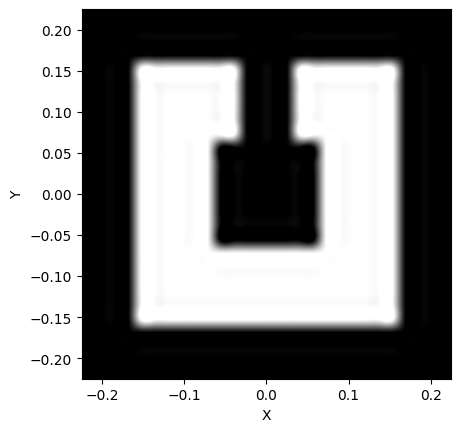

In [ ]:
sim.plot2D(output_plane=mp.Volume(size=mp.Vector3(width, height, 0), center=mp.Vector3(0,0,-t/2)))

     block, center = (0,0,2.25)
          size (1e+20,1e+20,4.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.97655,1.97655,1.97655)
     block, center = (0,0.115,-0.01)
          size (0.32,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-0.115,-0.01)
          size (0.32,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0.115,0,-0.01)
          size (0.09,0.32,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.115,0,-0.01)
          size (0.09,0.32,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0.115,-0.01)
          size (0.07,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon d

<AxesSubplot:xlabel='X', ylabel='Z'>

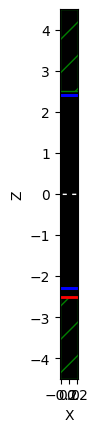

In [ ]:
sim.plot2D(output_plane=mp.Volume(size=mp.Vector3(a, 0, depth), center=mp.Vector3(0,0,0)))

In [ ]:
pt = mp.Vector3(0,0,depth/2-dpml-0.1)
sim.run(until_after_sources=mp.stop_when_fields_decayed(50,pol,pt,0.001))

refl_flux = mp.get_fluxes(refl)
tran_flux = mp.get_fluxes(tran)

on time step 232 (time=1.93333), 0.0172698 s/step
on time step 533 (time=4.44167), 0.0133076 s/step
on time step 833 (time=6.94167), 0.0133363 s/step
on time step 1135 (time=9.45833), 0.0132623 s/step
on time step 1442 (time=12.0167), 0.0130367 s/step
on time step 1750 (time=14.5833), 0.0130114 s/step
on time step 2056 (time=17.1333), 0.013088 s/step
on time step 2358 (time=19.65), 0.0132582 s/step
on time step 2660 (time=22.1667), 0.0132609 s/step
on time step 2961 (time=24.675), 0.0133159 s/step
on time step 3265 (time=27.2083), 0.0131907 s/step
on time step 3571 (time=29.7583), 0.013102 s/step
on time step 3879 (time=32.325), 0.0129953 s/step
on time step 4187 (time=34.8917), 0.0130093 s/step
on time step 4494 (time=37.45), 0.0130605 s/step
on time step 4798 (time=39.9833), 0.0131601 s/step
on time step 5104 (time=42.5333), 0.0130964 s/step
on time step 5409 (time=45.075), 0.013116 s/step
on time step 5713 (time=47.6083), 0.0131654 s/step
field decay(t = 50.00833333333333): 0.130149

     block, center = (0,0,2.25)
          size (1e+20,1e+20,4.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.97655,1.97655,1.97655)
     block, center = (0,0.115,-0.01)
          size (0.32,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-0.115,-0.01)
          size (0.32,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0.115,0,-0.01)
          size (0.09,0.32,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.115,0,-0.01)
          size (0.09,0.32,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0.115,-0.01)
          size (0.07,0.09,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon d

<AxesSubplot:xlabel='Y', ylabel='Z'>

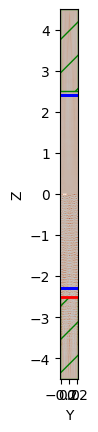

In [ ]:
sim.plot2D(output_plane=mp.Volume(size=mp.Vector3(0, a, depth), center=mp.Vector3(0,0,0)), fields=pol)

In [ ]:
wl = 1/np.array(freqs)

---
#### S parameters

In [ ]:
S11 = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
S21 = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

MPB solved for frequency_1(0,0,0.2) = 0.2 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.200000)
MPB solved for frequency_1(0,0,0.208081) = 0.208081 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.208081)
MPB solved for frequency_1(0,0,0.216162) = 0.216162 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.216162)
MPB solved for frequency_1(0,0,0.224242) = 0.224242 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.224242)
MPB solved for frequency_1(0,0,0.232323) = 0.232323 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.232323)
MPB solved for frequency_1(0,0,0.240404) = 0.240404 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.240404)
MPB solved for frequency_1(0,0,0.248485) = 0.248485 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.248485)
MPB solved for frequency_1(0,0,0.256566) = 0.256566 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.256566)
MP

In [ ]:
a = np.array([coef[1] for coef in S11])
b = np.array([coef[0] for coef in S21])
c = np.array([coef[0] for coef in S11])

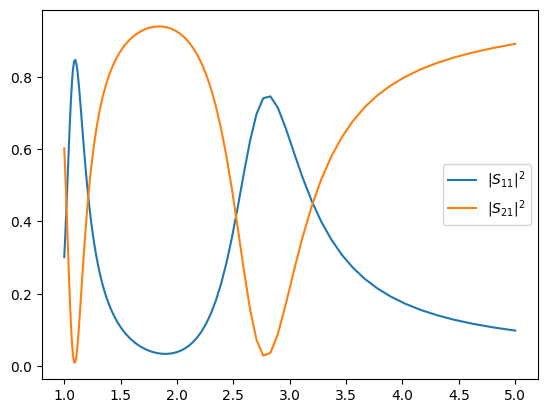

In [ ]:
plt.plot(wl, np.abs(a/c)**2, label='$|S_{11}|^2$')
plt.plot(wl, np.abs(b/c)**2, label='$|S_{21}|^2$')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(freqs, np.abs(a/c)**2, 'b', label='$|S_{11}|^2$')
plt.plot(freqs, np.abs(b/c)**2, 'r', label='$|S_{12}|^2$')

NameError: name 'freqs' is not defined

Save S parameters to xlsx file

In [ ]:
# Save S parameter data to xmls
import pandas as pd

f = np.array(freqs)
df = pd.DataFrame(data={'f': f, 'R': a/c, 'T': b/c, 'a': a, 'b': b, 'c': c})
df.to_excel('s_params_yy.xlsx')

In [ ]:
str(mp.Ex)

'0'

---

#### Retrieval

In [ ]:
k = 2*np.pi/wl
prepad = st-dpml-0.2-t # Distance between reflection monitor and metamaterial
postpad = st-dpml-0.1 # Distance between metamaterial back and transmission monitor

S11 = a/c * np.exp(-1j*k*(2*prepad+0.2))
S21 = b/c * np.exp(-1j*k*(prepad+0.2)-1j*k*n_SiO2*postpad)

S11 = a/c * np.exp(-1j*k*(2*prepad))
S21 = b/c * np.exp(-1j*k*prepad-1j*k*n_SiO2*postpad)

In [ ]:
# Save S parameters
import pandas as pd
df = pd.DataFrame(data={'f': f, 'R': S11, 'T': S21})
df.to_excel('MATLAB/new_s_params.xlsx', index=False)

In [ ]:
def retrieve(S11, S21, branch=0):
    z = np.sqrt(((1+S11)**2-S21**2)/((1-S11)**2-S21**2))
    einkd = S21/(1 - S11*(z-1)/(z+1))
    n = 1/(k*t) * (np.imag(np.log(einkd))+2*np.pi*branch - 1j*np.real(np.log(einkd)))

    eps = n/z
    mu = n*z

    return [eps, mu, n, z]

In [ ]:
[eps, mu, n, z] = retrieve(S11, S21, 0)

plt.figure(dpi=100)
plt.plot(freqs*c_/1e6, np.real(eps), label='$\operatorname{Re}(\epsilon)$')
plt.plot(freqs*c_/1e6, 10*np.real(mu), label='$10\operatorname{Re}(\mu)$')
plt.plot(freqs*c_/1e6, np.zeros(nfreqs), '--', color='black')
plt.legend()

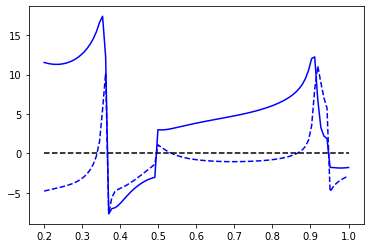

In [ ]:
plt.figure()
plt.plot(freqs, np.real(n), 'blue')
plt.plot(freqs, np.imag(n), 'blue', linestyle='dashed')
plt.plot(freqs, np.zeros(nfreqs), '--', color='black')

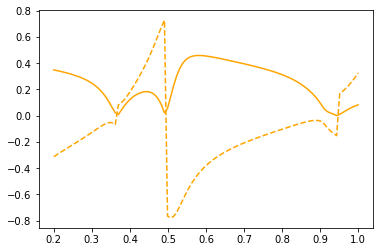

In [ ]:
plt.figure()
# plt.plot(freqs, np.real(n), 'blue')
# plt.plot(freqs, np.imag(n), 'blue', linestyle='dashed')
plt.plot(freqs, np.real(z), 'orange')
plt.plot(freqs, np.imag(z), 'orange', linestyle='dashed')

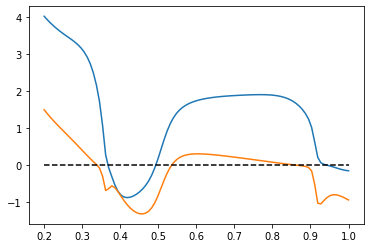

In [ ]:
plt.figure()
plt.plot(freqs, np.real(n)*np.real(z))
plt.plot(freqs, np.imag(n)*np.imag(z))
plt.plot(freqs, np.zeros(nfreqs), '--', color='black')

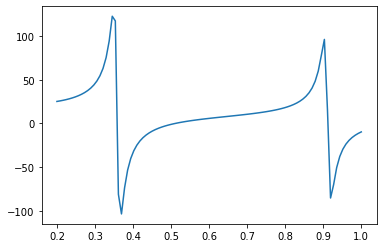

In [ ]:
tmp = (np.real(n)*np.real(z)+np.imag(n)*np.imag(z))/(np.real(z)**2+np.imag(z)**2)
plt.plot(freqs, tmp)

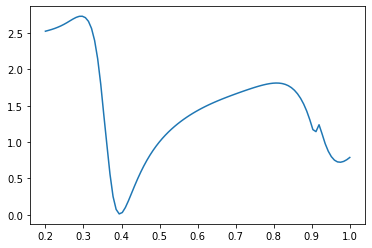

In [ ]:
plt.plot(freqs, np.real(n)*np.real(z)-np.imag(n)*np.imag(z))